## Exploring the SIR Data Reduction Method for Visualization
In his 1991 paper, Prof. Ker-Chau Li (UCLA) introduced a fascinating method for supervised dimensionality reduction called SIR (Sliced Inverse Regression) assuming the following model:

$$Y  = f(\beta_1 \mathbf{X}, \dots, \beta_K \mathbf{X},\epsilon ) $$

Where $\mathbf{X} \in \mathbb{R}^{n \times p}$, and $f$ can be any function on $\mathbb{R}^{K+1}.$ Without delving into theory the method works by considering the inverse regression curve $E(\mathbf{X}|Y)$, and estimating $E(\mathbf{X}|Y)$ via slicing. Under some mild assumptions (and assuming $\mathbf{X}$ has been standardized), the inverse regression curve is contained in the subspace spanned by the $\beta_1,\dots, \beta_K$. The method uses a principal components analysis on the covariance matrix of the inverse regression curve to estimate its orientation. 

For fun, I implemented the basic SIR method in python with three methods:
- fit
- transform
- fit_transform

Begin by importing numpy, matplotlib, and SIR  

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from SIR import SIR
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline 

In this example we will model death rate as a function of 15 variables
The dataset and metadata can be found at the following link: https://people.sc.fsu.edu/~jburkardt/datasets/regression/x28.txt

In [2]:
dataset = pd.read_csv('death_rate.txt',delim_whitespace=True,header =None)
dnp = dataset.drop(0,axis = 1).values
Y = dnp[:,-1]
X = dnp[:,:-1]

We use fit and transform to find a 2 dimensional representation of the 15 dimensional data

In [3]:
sir_ = SIR()
sir_.fit(X,Y)

In [14]:
transformed_vals = np.real(sir_.transform(X))
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(transformed_vals[:,0],transformed_vals[:,1],Y)

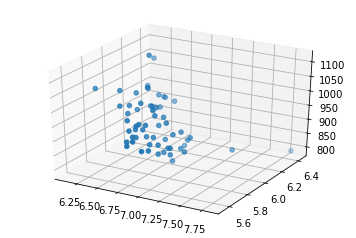

In [15]:
plt.show()

The Z axis is the original Y values and the X and Y axes are the projection of the original 15 dimensional data onto 2 dimensions

**Reference:** 

Sliced Inverse Regression for Dimension Reduction  
Author: Ker-Chau Li  
Source: Journal of the American Statistical Association, Vol.86 No 414 (Jun. 1991)